# k-Nearest Neighbors

Pros: High accuracy, insensitive to outliers, no assumptions about data

Cons: Computationally expensive, requires a lot of memory

Works with: Numeric values, nominal values

We have an existing set of example data, our training set. We have
labels for all of this data—we know what class each piece of the data should fall into.
When we’re given a new piece of data without a label, we compare that new piece of
data to the existing data, every piece of existing data. 

We then take the most similar
pieces of data (the nearest neighbors) and look at their labels. We look at the top k
most similar pieces of data from our known dataset; this is where the k comes from. (k
is an integer and it’s usually less than 20.) Lastly, we take a majority vote from the k
most similar pieces of data, and the majority is the new class we assign to the data we
were asked to classify.

In [102]:
from numpy import *
import operator
#operator is used to sort the knn algorithm
from os import listdir

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels
group,labels = createDataSet()

# creates two variables group and labels

In [15]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [16]:
labels

['A', 'A', 'B', 'B']

For every point in our dataset:

    calculate the distance between inX and the current point

    sort the distances in increasing order

    take k items with lowest distances to inX

    find the majority class among these items

    return the majority class as our prediction for the class of inX

In [66]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [22]:
classify0([0,0],group,labels,3)

'B'

To test out a classifier, you start with some known data so you can hide the answer
from the classifier and ask the classifier for its best guess. You can add up the number
of times the classifier was wrong and divide it by the total number of tests you gave it.
This will give you the error rate, which is a common measure to gauge how good a classifier
is doing on a dataset. An error rate of 0 means you have a perfect classifier, and
an error rate of 1.0 means the classifier is always wrong.

## This function takes a filename string and outputs two things: a matrix of training examples and a vector of class labels.

In [37]:
def file2matrix(filename):
    fr = open(filename)
    #Get number of lines in file
    numberOfLines = len(fr.readlines())
    #prepare Numpy matrix to return,  hardcoded at the  moment to various inputs
    returnMat = zeros((numberOfLines,3))
    #prepare labels return
    classLabelVector = []
    fr = open(filename)
    index = 0
    #Parse line to a list
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        #use pythons feature of negative indexing to get the last item from list to put into classLabelVector
        classLabelVector.append(listFromLine[-1])
        index += 1
    return returnMat,classLabelVector
    


In [38]:
datingDataMat , datingLabels = file2matrix('datingTestSet.txt')

In [39]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [40]:
datingLabels[0:20]

['largeDoses',
 'smallDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'largeDoses',
 'largeDoses',
 'didntLike',
 'largeDoses',
 'didntLike',
 'didntLike',
 'smallDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'smallDoses',
 'largeDoses']

## Analyze: creating scatter plots with Matplotlib

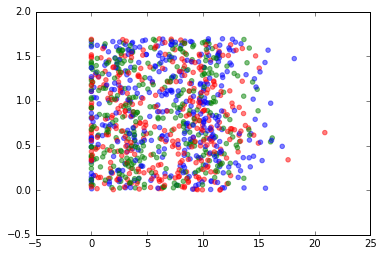

In [56]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2],color=['red','green','blue'], alpha=0.5)
plt.show()

## Prepare: normalizing numeric values

When dealing with values that lie in different ranges, it’s common to normalize them.
Common ranges to normalize them to are 0 to 1 or -1 to 1. To scale everything from 0
to 1, you need to apply the following formula:

    newValue = (oldValue-min)/(max-min)

In [57]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals

In [61]:
normMat,ranges,minVals = autoNorm(datingDataMat)

In [62]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [63]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [64]:
minVals

array([ 0.      ,  0.      ,  0.001156])

## Test: testing the classifier as a whole program

In classification, the error rate is the number of misclassified pieces of data
divided by the total number of data points tested. An error rate of 0 means you have a
perfect classifier, and an error rate of 1.0 means the classifier is always wrong.

In [69]:
def datingClassTest():
    #hold out 10%
    hoRatio = 0.50  
    #load data setfrom file
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print ("the classifier came back with: %s, the real answer is: %s" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print (errorCount)

In [70]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

## Use: putting together a useful system

In [90]:
def classifyPerson():
    resultList = ['not at all','in small doses', 'in large doses']
    percentTats = float(input(\
                                  "percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = int(classify0((inArr-\
                                  minVals)/ranges,normMat,datingLabels,3))
    print ("You will probably like this person: ",\
           resultList[classifierResult-1])

In [ ]:
classifyPerson()

# Using kNN on a handwriting recognition system

### Prepare: converting images into test vectors

In [96]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [97]:
testVector = img2vector('testDigits/0_13.txt')

In [98]:
testVector[0,0:31]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [101]:
testVector[0,32:61]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

### Test: kNN on handwritten digits

In [107]:
def handwritingClassTest():
    hwLabels = []
    #load the training set
    trainingFileList = listdir('trainingDigits') 
    #how many files are in that directory
    m = len(trainingFileList)
    #create a training matrix with m rows and 1024 columns to hold each image as a single row.
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print( "\nthe total number of errors is: %d" % errorCount)
    print( "\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [108]:
handwritingClassTest()

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answe

#### Using the kNN algorithm on this dataset, you were able to achieve an error rate of 1.2%.

kNN is an example of instance-based learning, where you need to have instances of data close
at hand to perform the machine learning algorithm. The algorithm has to carry
around the full dataset; for large datasets, this implies a large amount of storage. In
addition, you need to calculate the distance measurement for every piece of data in
the database, and this can be cumbersome.

An additional drawback is that kNN doesn’t give you any idea of the underlying
structure of the data; you have no idea what an “average” or “exemplar” instance from
each class looks like.